# Overview 

Please see the [homework policy](https://fdl.thecoatlessprofessor.com/syllabus/#homework)
for detailed instructions and some grading notes. Failure to follow instructions
will result in point reductions. In particular, make sure to commit each 
exercise as you complete them. 

> "Machine intelligence is the last invention that humanity will ever need to make."
>
> -- Nick Bostrom

## Grading

The rubric CAs will use to grade this assignment is:

| Task                                                   | Pts |
|:-------------------------------------------------------|----:|
| Making a Homemade Neural Network from Scratch!         | 100 |
| Cruisin' Keras                                         | 20  |
| PyTorch et al are friends not food                     | 30  |
| Total                                                  | 150 |

## Objectives 

The objectives behind this homework assignment are as follows:

- Implement functions in Python;
- Constructing neural networks;
- Designing PyTorch modules; and
- Establishing sequential layers with Keras.

# Assignment - Homework 4
STAT 430 - FDL, Spring 2020

Due: **Sunday, April 12th, 2020 at 6:00 PM**

- **Author: Skyler Shi**
- **NetID: jingtao2** 

### Collaborators

If you worked with any other student in preparing these answers, please
make sure to list their full names and NetIDs (e.g. `FirstName LastName (NetID)` ).


In [1]:
print("Diagnostics: ")

try:
  from google.colab import drive
  is_google_colab = True
  import sys
  import pandas as pd
  import numpy as np

  %tensorflow_version 2.x
  import tensorflow as tf

  import torch
  import torch.nn as nn
  import torch.nn.functional as F
  import torch.optim as optim
  from torchvision import datasets, transforms
  from torch.optim.lr_scheduler import StepLR
  # Detect if a GPU is present with CUDA support
  use_cuda = torch.cuda.is_available()

  print(f"python: {sys.version}")
  print(f"pandas: {np.__version__}")
  print(f"tensorflow: {tf.__version__}")
  print(f"pytorch: {torch.__version__}")
  print(f"GPU Enabled: {use_cuda}")
  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")

Diagnostics: 
Notebook is being run locally or through another source.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

## [50 points] Exercise 1 - Making a Homemade Neural Network from Scratch!

In this exercise block, we'll build a neural network that consists of two hidden layers and an output layer.

In the first and second hidden layers, there will be _unknown_ number of neurons. Let the neurons in the first hidden layer be denoted as $n_j^{(1)}$. Within the second hidden layer and output layer, let there be $n_c^{(2)}$ neurons. Both hidden layers should include a bias term to make the counts respectively $n_j^{(1)} + 1$ and $n_c^{(2)} + 1$.  For the non-linear activation functions, let the first hidden layer use 
$g^{(1)} (x) = \mathrm{ReLU}(x)$, the second hidden layer be $g^{(2)} (x) = \sigma(x)$. Finally, in the output layer, apply the $\mathrm{softmax}(x)$ to obtain exactly $n_c^{(2)}$ neurons that correspond to $C$ classes. 

We'll use the categorical cross-entropy cost function of 

$$
J\left(\boldsymbol{W}\right) = -\frac{1}{N} \sum_{i=1}^{N} { \sum_{c=1}^{C} { y_{ic} \log\left({ \hat y_{ic} }\right)  }}
$$

where,

- $\boldsymbol{W}$ represents the weights of the neural network -- including the bias term,
- $N$ represents the number of examples the network is being trained with,
- $y_{ic}$ is the true label in $c \in C$, and;
- $\hat y_{ic}$ is the predicted label probability in $c \in C$.

Within this part, we'll construct functions that: 

1. Initialize the parameters of the network.
1. Train
  - Perform forward propagation
  - Compute cost function
  - Perform backward propagation
  - Update network parameters
1. Predict




### (a) (10 points) Sketching the computational graph

Sketch the computational graph for the described neural network. For each layer on the graph, write out the forward propagation equations in matrix equation form. 



![alt text](./1.a2.jpeg)

**Note**: the bias matrices should get broadcasted in numpy

![alt text](./1.a.jpeg)

### (b) (10 points) Deriving the backward propagation equations

Within this step, derive the backward propagation equations for the network
by obtaining the necessary partial derivatives.



![alt text](./1.b.jpeg)

### (c) (5 points) Training Data Reshaping

Reshaping data is a common requirement for working with neural networks. Previously, the assumption about data in neural networks
was that there is exactly _one_ example or image. In practice, there needs to
be a large amount of data for the neural network to function. Previously, $X$ was defined to be a single input vector: 

$$
X_{m \times 1} = \begin{bmatrix}
\vert \\
X^{[1]}  \\
\vert  \\
\end{bmatrix}_{m \times 1}
$$

To enable multiple training examples, let's define $X$ to be:

$$
X_{m \times n_e} = \begin{bmatrix}
\vert & \vert & \vert \\
X^{[1]} & X^{[2]} & X^{[3]} \\
\vert & \vert & \vert \\
\end{bmatrix}_{m \times n_e}
$$

where $m$ is the number of inputs and $n_e$ is the number of observations. Therefore, $Z^{(1)}$ would now look like:

$$
Z^{(1)} = \begin{bmatrix}
\vert & \vert & \vert \\
Z^{(1)[1]} & Z^{(1)[2]} & Z^{(1)[3]} \\
\vert & \vert & \vert \\
\end{bmatrix}_{n_h \times n_e}
$$

Let the parentheses -- $()$ -- denote the layer number and the square brackets
-- $[]$ -- be the training data example.

Having said this, please reshape the MNIST training data from:

$$\text{Examples }\times \text{Height } \times \text{Width }$$

To being shaped as:

$$\underbrace{\left(\text{Height } \cdot \text{Width }\right)}_{=m} \times \underbrace{\text{Examples }}_{=n_e}$$


Through this process, the data is being flattened:

$$\underbrace{\left(\text{Height } \cdot \text{Width }\right)}_{=m}$$

_Hints:_

- Change a data's shape is possible with [`np.reshape(data, (-1, data.shape[0]))`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape)
- Arrays can be transposed with [`data.T`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html)

When in doubt, work with a small example first, before the full data.




In [12]:
import numpy as np
a = np.arange(24).reshape((4, 3, 2))
b = np.arange(3)
print(a)
print()
print(b)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]

[0 1 2]


In [13]:
np.reshape(a, (4,-1)).T

array([[ 0,  6, 12, 18],
       [ 1,  7, 13, 19],
       [ 2,  8, 14, 20],
       [ 3,  9, 15, 21],
       [ 4, 10, 16, 22],
       [ 5, 11, 17, 23]])

In [23]:
# %tensorflow_version 2.x
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

# Load the MNIST data via a helper
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Perform scaling
x_train, x_test = x_train / 255.0, x_test / 255.0

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_train = np.reshape(x_train, (x_train.shape[0],-1)).T
x_train.shape

(784, 60000)

In [26]:
x_test.shape

(10000, 28, 28)

In [27]:
x_test = np.reshape(x_test, (x_test.shape[0],-1)).T
x_test.shape

(784, 10000)

In [28]:
# Code here


# Grading helper:
print(f'X has dimensions: {x_train.shape}')

X has dimensions: (784, 60000)


### (d) (5 points) Test Data Reshaping

Encode the label data ($Y$) using one-hot encoding. 

The data has the following labels:

| Label|Class       |
|-----:|:-----------|
|     0|T-shirt/top |
|     1|Trouser     |
|     2|Pullover    |
|     3|Dress       |
|     4|Coat        |
|     5|Sandal      |
|     6|Shirt       |
|     7|Sneaker     |
|     8|Bag         |
|     9|Ankle boot  |



In [29]:
y_train = pd.get_dummies(y_train).to_numpy()
y_train.shape

(60000, 10)

In [30]:
y_test = pd.get_dummies(y_test).to_numpy()
y_test.shape

(10000, 10)

In [31]:
# Code here




# Grading helper
print(f'Y has dimensions: {y_train.shape}')
print(f'Number of Images: {y_train.shape[0]}')

Y has dimensions: (60000, 10)
Number of Images: 60000


### (e) (5 points) He initialization

Create a function to initialize weight parameters for a given layer in the neural network. The weight initialization should use [He's initialization](https://arxiv.org/abs/1502.01852) given by:

$$
\begin{align*}
W &\sim N(0, 1) \\
W &:= W\sqrt{\frac{2}{n^{(l-1)}}}
\end{align*}
$$

where $N(0,1)$ is the standard normal distribution, $n^{(l-1)}$ denotes the number of input weights, and $n^{(l)}$ is the
number of output weights.

Implementation Guidelines:

- **Arguments:**
    - `n_in`: Number of input weights
    - `n_out`: Number of output weights
- **Return:**
    - `W` a matrix of dimension $n^{(l)} \times n^{(l-1)}$

_Hints:_ NumPy has a built in way of generating random data with [`np.random.randn(n, p)`](https://numpy.org/doc/1.18/reference/random/generated/numpy.random.randn.html)

---



In [13]:
# Code Here
def init_layer_weights(n_in, n_out):
    return np.random.randn(n_out, n_in) * np.sqrt(2 / n_in)

### (f) (5 points) Parameter Initialization

Using the function in **(e)** construct a function 
that initializes both the weights and the bias terms for each layer. The bias values should be initialized with 0 and the weights should be initialized with the function developed in **(e)**.

Implementation Guidelines:

- **Arguments:**
    - `m`: Number of input neurons
    - `n_h`: Number of hidden neurons
    - `n_y`: Number of output neurons
- **Return:**
    - `cache_parameters` with a dictionary data structure that contains:
       - `W^(1)` a matrix of dimension `n_h X m`
       - `b^(1)` a matrix of dimension `n_h X 1`
       - `W^(2)` a matrix of dimension `n_y X n_h`
       - `b^(2)` a matrix of dimension `n_y X 1`

_Hint:_ 

- NumPy has a built in way of generating a zero vector with [`np.zeros((n, p))`](https://numpy.org/doc/1.18/reference/generated/numpy.zeros.html)

In [14]:
# Code here
# n_j is number of hidden neurons
# n_c is number of output neurons
# doing this for consistency
def initialize_weights_biases(m, n_j, n_c):
    return {
        'W1': init_layer_weights(n_out = n_j, n_in = m),
        'b1': np.zeros((n_j, 1)),
        'W2': init_layer_weights(n_out = n_c, n_in = n_j),
        'b2': np.zeros((n_c,1))
    }

### (g) (10 points) Activation Functions

Implement the ReLU, Sigmoid, and Softmax activation functions alongside their derivatives.

Implementation Guidelines for each function:

- **Arguments:**
    - `X` a matrix of dimension `a X b`.
- **Return:**
    - Appropriately "activated" or "derivative" matrix of dimension `a X b`




In [104]:
def relu(z):
    # Code Here
    return np.maximum(z, 0)

def relu_prime(z):
    # Code here
    prime = z
    prime[prime <= 0] = 0
    prime[prime > 0] = 1
    return prime

def sigmoid(z):
    # Code here
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    # Code here
    prime = sigmoid(z) * (1 - sigmoid(z))
    return prime

def softmax(z):
    # Code here
    shiftz = z - np.max(z, axis = 0)
    exps = np.exp(shiftz)
    return exps / np.sum(exps, axis = 0)


# def softmax_prime(z):
#     # Code here
#     prime = np.multiply(softmax(z), 1 - softmax(z))
#     return prime


### (h) (10 points) Forward propagation

Implement a function that performs the forward propagation
and caches (saves) the value computed at each node on the computational graph. 

Implementation Guidelines:

- **Arguments:**
    - `X` a matrix of dimension `m X n_e`.
    - `cache_parameters` with a dictionary data structure.
- **Return:**
    - `SM` a matrix of dimension `n_y X n_e`
    - `cache_forward` with a dictionary data structure that contains:
       - `Z^{(1)}`
       - `A^{(1)}`
       - `Z^{(2)}`
       - `A^{(2)}`
       - `SM`

_Note:_ $A^{(2)} \rightarrow SM$ to provide the softmax output that gives $\hat y$. 


_Hint:_

- Recall that items in a dictionary data structure can be accessed with `data["item"]`.


In [105]:
# Code here
def forward_prop(X, cache_parameters):
    W1 = cache_parameters['W1']
    b1 = cache_parameters['b1']
    W2 = cache_parameters['W2']
    b2 = cache_parameters['b2']
    
    Z1 = W1 @ X + b1      # (n_j X m)  @  (m X n_e)  +  (n_j, 1)  =  (n_j X n_e)
    A1 = relu(Z1)         # (n_j X n_e)
    Z2 = W2 @ A1 + b2     # (n_c X n_j)  @  (n_j X n_e)  +  (n_c, 1)  =  (n_c X n_e)
    A2 = sigmoid(Z2)      # (n_c X n_e)
    SM = softmax(A2)      # (n_c X n_e)
    
    return SM, {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2,
        'SM': SM
    }
    

**Why is it important to store the values computed in the prediction step?**

We need to store the values in forward propagation so we can update them during back propagation. Otherwise we wouldn't know what weights and bias values to update. The weights update formula requires **current weights** and the current derivative.

### (i) (10 points) Backward propagation

Implement a function that performs the backward propagation
at each node on the computational graph. 


- **Arguments:**
    - `Y` a matrix of dimension `n_e X n_c`.
    - `X` a matrix of dimension `m X n_e`.
    - `cache_parameters` a data dictionary.
    - `cache_forward` a data dictionary.
- **Return:**
    - `cache_grad` with a dictionary data structure that contains:
       - `dW2`
       - `db2`
       - `dW1`
       - `db1`

In [112]:
# Code here
def backward_prop(Y_actual, X, cache_parameters, cache_forward):
    Z2, Z1, A2, A1 = cache_forward['Z2'], cache_forward['Z1'], cache_forward['A2'], cache_forward['A1']
    SM = cache_forward['SM']
    W2 = cache_parameters['W2']         #n_c X n_j
    

    delta1 = 1 / Y_actual.shape[0] * np.multiply((SM.T - Y_actual), sigmoid_prime(Z2).T)       # n_e X n_c
    #                                                n_e X n_c           n_e X n_c 
    
    dW2 = delta1.T @ A1.T                                                 # n_c X n_j
    #     n_c X n_e  n_e X n_j
    
    db2 = np.sum(delta1.T, axis = 1, keepdims = True)                     # n_c X 1
    #             n_c X n_e
    
    delta2 = np.multiply(delta1 @ W2, relu_prime(Z1).T)                   # n_e X n_j
    #              n_e X n_c  n_c X n_j     n_e X n_j
     
    dW1 = delta2.T @ X.T                                                  # n_j X m
    db1 = np.sum(delta2.T, axis = 1, keepdims = True)                       # n_j X 1
    
    
    return {
        'dW2': dW2,
        'db2': db2,
        'dW1': dW1,
        'db1': db1
    }

In [84]:
# Code here
def backward_prop(Y_actual, X, cache_parameters, cache_forward):
    Z2, Z1, A2, A1 = cache_forward['Z2'], cache_forward['Z1'], cache_forward['A2'], cache_forward['A1']
    SM = cache_forward['SM']
    W2 = cache_parameters['W2']         #n_c X n_j
    

    delta1 = 1 / Y_actual.shape[0] * np.multiply((SM - Y_actual.T), sigmoid_prime(Z2))       # n_e X n_c
#                                                   n_e X n_c           n_e X n_c 
                                                    #n_c X n_e          n_c X n_e
    
    dW2 = delta1 @ A1.T                                                  # n_c X n_j
    #     n_c X n_e  n_e X n_j
    
    db2 = np.sum(delta1, axis = 1, keepdims = True)                     # n_c X 1
    #             n_c X n_e
    
    delta2 = np.multiply(W2.T @ delta1, relu_prime(Z1))                    # n_e X n_j
    #              n_e X n_c  n_c X n_j     n_e X n_j
    #              n_j X n_c  n_c X n_e     n_j X n_e                   n_j X n_e
     
    dW1 = delta2 @ X.T                                                    # n_j X m
    db1 = np.sum(delta2, axis = 1, keepdims = True)                      # n_j X 1
    
#     print(dW2)
    
    return {
        'dW2': dW2,
        'db2': db2,
        'dW1': dW1,
        'db1': db1
    }

### (j) (10 points) Parameter Update

With the backward propagation calculations in hand, the
next step is to update the parameters in the neural network. The update
step should be performed using **Batch Gradient Descent (BGD)**.

- **Arguments:**
    - `alpha` the learning rate parameter.
    - `cache_parameters` a data dictionary containing parameters.
<!--     - `cache_forward` a data dictionary containing forward propagation. -->
    - `cache_grad` a data dictionary containing the gradients.
- **Return:**
    - `cache_parameters` an updated version of the dictionary data structure that contains:
       - `W2`
       - `b2`
       - `W1`
       - `b1`


In [106]:
# Code here

def batch_GD(alpha, cache_parameters, cache_grad):
    dW2, db2, dW1, db1 = cache_grad['dW2'], cache_grad['db2'], cache_grad['dW1'], cache_grad['db1']
    W2, b2 = cache_parameters['W2'], cache_parameters['b2']
    W1, b1 = cache_parameters['W1'], cache_parameters['b1']
    
    return {
        'W2': W2 - alpha * dW2,
        'b2': b2 - alpha * db2,
        'W1': W1 - alpha * dW1,
        'b1': b1 - alpha * db1
    }

### (k) (10 points) Train the model

Create a function that encases all of the prior functions. This function should
perform the training and provide side-effects of the training process. 

- **Arguments:**
    - `Y` a matrix of dimension `n_e X n_c`.
    - `X` a matrix of dimension `m X n_e`.
    - `n_h` number of neurons in the hidden layer.
    - `alpha` the learning rate parameter. Default `1e-4`. (Check)
    - `epochs` the total number of times to train. Default `100000`.
- **Side-effect**
    - Every 1000 iterations output the iteration number and the present cost.
- **Return:**
    - `cost_history` the cost values from each iteration of the training step.
    - `cache_parameters` with a dictionary data structure that contains:
       - `W2`
       - `b2`
       - `W1`
       - `b1`

$$
J\left(\boldsymbol{W}\right) = -\frac{1}{N} \sum_{i=1}^{N} { \sum_{c=1}^{C} { y_{ic} \log\left({ \hat y_{ic} }\right)  }}
$$

In [96]:
def cross_entropy_cost(y_hat, y_actual):
    return -1/y_hat.shape[1] * np.sum(np.multiply(y_actual, np.log(y_hat)))

In [113]:
# Code Here
# Y. is actual values!!
def train_NN(Y, X, n_h, alpha = 0.0001, epochs = 100):
    m = X.shape[0]       # image size          m X n_e
    N = X.shape[1]       # number of images
    n_c = Y.shape[1]     # number of image categories
    print("Image size: {}\nNumber of images: {}\nNumber of image categories: {}\n\n".format(m,N,n_c))
    
    cost_history = []
    # init weights & biases
    cache_parameters = initialize_weights_biases(m = m, n_j = n_h, n_c = n_c)
    
    for epoch in range(epochs):
        # forward prop
        SM, cache_forward = forward_prop(X, cache_parameters)
        # calculate loss
        cost_history.append(cross_entropy_cost(y_hat = SM, y_actual = Y.T))
        # back prop
        cache_grad = backward_prop(Y, X, cache_parameters, cache_forward)
        # update weights & biases
        cache_parameters = batch_GD(alpha, cache_parameters, cache_grad)
        
        if epoch % 50 == 0:
            print("Iteration: {}\tCost: {}".format(epoch, cost_history[epoch]))
    
    return cost_history, cache_parameters
    

### (l) (5 points) Build the model and visualize it!

In this exercise, perform the full network training on the MNIST Fashion data.
Retrieve and visualize the cost function history across the number of epochs. 


In [114]:
x_train.shape

(784, 60000)

In [115]:
y_train.shape

(60000, 10)

In [136]:
# Code Here
cost_history, trained_params = train_NN(Y = y_train, X = x_train, n_h = 32, alpha = 0.00001, epochs = 10000)


Image size: 784
Number of images: 60000
Number of image categories: 10


Iteration: 0	Cost: 2.2974845549700724
Iteration: 50	Cost: 2.29741362485225
Iteration: 100	Cost: 2.2973427070900727
Iteration: 150	Cost: 2.2972718098921567
Iteration: 200	Cost: 2.297200917578072
Iteration: 250	Cost: 2.297130043832154
Iteration: 300	Cost: 2.297059196015277
Iteration: 350	Cost: 2.2969883735939343
Iteration: 400	Cost: 2.2969175945246953
Iteration: 450	Cost: 2.2968468544883205
Iteration: 500	Cost: 2.2967761050720985
Iteration: 550	Cost: 2.296705355017697
Iteration: 600	Cost: 2.29663462228937
Iteration: 650	Cost: 2.29656390687692
Iteration: 700	Cost: 2.296493216269879
Iteration: 750	Cost: 2.2964225402604126
Iteration: 800	Cost: 2.2963518604086013
Iteration: 850	Cost: 2.296281181553076
Iteration: 900	Cost: 2.2962105052132795
Iteration: 950	Cost: 2.296139846260376
Iteration: 1000	Cost: 2.2960692143811587
Iteration: 1050	Cost: 2.2959986096071785
Iteration: 1100	Cost: 2.295928013096168
Iteration: 1150	Cost:

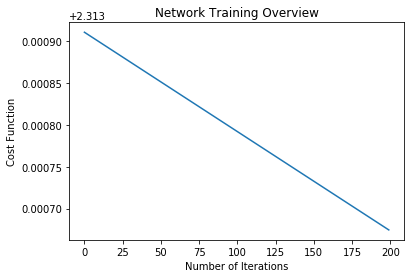

In [117]:
# Visualization code

# Must have variable named as `cost_history` with 1 dimension.
plt.plot(cost_history)
plt.ylabel('Cost Function')
plt.xlabel('Number of Iterations')
plt.title('Network Training Overview')
plt.show()


### (m) (5 points) Predict!

Use the model parameters obtained from training the network in **(i)** to make predictions on the data. Consider creating a prediction function to aide in this
task.

- **Arguments:**
<!--     - `Y` a matrix of dimension `n_e X K`. -->
    - `X` a matrix of dimension `m X n_e`.
    - `cache_parameters` a dictionary data structure that contains estimated parameters.
- **Return:**
    - `prediction` predicted values

_Hint:_ Logic for this was rewritten during the forward propagation step. 


In [137]:
# Code Here
def predict(X, trained_params):
    
    return forward_prop(X, trained_params)[0]

In [138]:
prediction = predict(x_test, trained_params)

The following should be used to show the image alongside of its predicted
class.

Note: 

- [`np.argmax(data)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) returns the index of the highest value.
- [`np.max(data)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.max.html) returns the highest value.

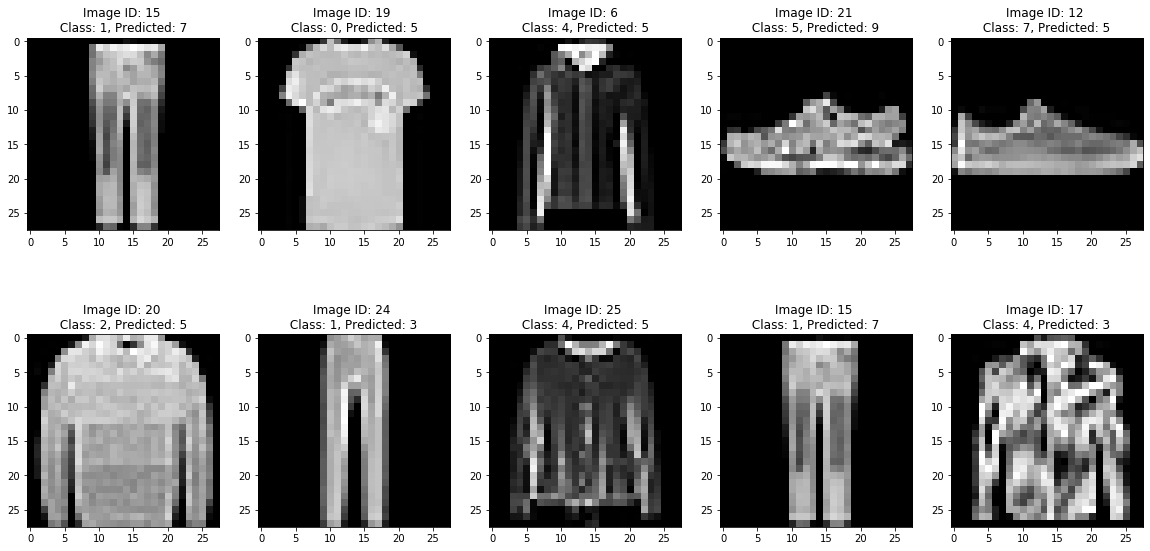

In [139]:
# %tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt

fashion_mnist_viz = tf.keras.datasets.fashion_mnist

# Load the MNIST data via a helper
(x_train_viz, y_train_viz), (x_test_viz, y_test_viz) = fashion_mnist_viz.load_data()
# Perform scaling
x_train_viz, x_test_viz = x_train_viz / 255.0, x_test_viz / 255.0

# Set seed for reproducibility
################################################
# Change to the last four digits of your UIN
################################################
np.random.seed(1234)

# Obtain a set of indices to obtain predictions
idx = list(np.random.randint(x_test_viz.shape[1], size = 10))

plt.figure(figsize = (20,10))
for i in range(10):
    obs = idx[i]                      # Retrieve the index
    plt.subplot(2, 5, i+1)            # Create a subplot
    
    img = x_test_viz[obs].reshape((28,28))
    
    pred = np.argmax(prediction[:,obs])

    plt.imshow(img, cmap='gray')      # Plot gray scale
    plt.title(f'Image ID: {obs} \n Class: {y_test_viz[obs]}, Predicted: {pred} ')
#     plt.tight_layout()

In [140]:
# get the accuracy of the neural net on the test data set
pred = np.argmax(prediction, axis = 0)
y_true = y_test_viz

from sklearn.metrics import accuracy_score

accuracy_score(pred, y_true)

0.1376

## [20 points] Exercise 2 - Cruisin' Keras!

In this exercise block, we'll implement the same neural network from **Exercise 1** but using Keras. 


### (a) (10 points) Structuring a model in keras

Structure a two-layer sequential model in Keras that mirrors the guidelines in **Exercise 1**. Show the model layer information.

In [5]:
# %tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

# Code Here
model = models.Sequential()
model.add(
    layers.Dense(32, activation='relu', input_shape = (784,))
)
model.add(
    layers.Dense(10, activation='sigmoid')
)
model.add(
    layers.Activation('softmax')
)

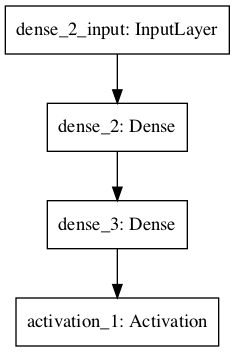

In [7]:
from tensorflow.keras import utils
utils.plot_model(model)

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


### (b) (10 points) Model Training

Train the neural network within Keras. Training should be done in a similar 
manner to **Exercise 1 (j) and (k)**. Unlike before, please construct a graph that shows training and test behavior. This information is available on
the `model.fit` call.

In [2]:
from tensorflow.keras import optimizers
model.compile(
    optimizer = optimizers.RMSprop(learning_rate=1e-4),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

NameError: name 'model' is not defined

In [1]:
# Code Here
history = model.fit(x_train.T, y_train, epochs = 50, batch_size = 2000, validation_split=0.2)

NameError: name 'model' is not defined

In [33]:
test_cost, test_acc = model.evaluate(x_test.T, y_test) 

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [34]:
test_cost, test_acc

(1.6378927190780639, 0.7641)

In [ ]:
# Visualization code here... 

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Network Training')
plt.ylabel('Cost Function')
plt.xlabel('Number of Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [24]:
history.history['validation_loss']

KeyError: 'validation_loss'

In [22]:
history.history['loss']

[2.2852359771728517,
 2.2484819094340005,
 2.2189807812372844,
 2.1938921054204306,
 2.171629039446513,
 2.151405032475789,
 2.1328980684280396,
 2.115600840250651,
 2.098747221628825,
 2.0819208145141603,
 2.0676167329152424,
 2.0547248919804892,
 2.042996573448181,
 2.0323133865992227,
 2.022473621368408,
 2.0133550643920897,
 2.0048707246780397,
 1.996935764948527,
 1.98945099512736,
 1.9822973688443501,
 1.9754088640213012,
 1.9687622944513956,
 1.9622851808865864,
 1.955887003739675,
 1.9494557579358418,
 1.9424008131027222,
 1.935011621316274,
 1.9275016069412232,
 1.9198825796445211,
 1.912167727947235,
 1.9044180631637573,
 1.8965688347816467,
 1.8885714014371235,
 1.8804971694946289,
 1.8724680622418721,
 1.864586627483368,
 1.8570026834805806,
 1.849674113591512,
 1.8426689028739929,
 1.8359912316004434,
 1.8295788844426473,
 1.8233245134353637,
 1.817143166065216,
 1.8110853473345438,
 1.8052367051442464,
 1.799695364634196,
 1.7945279439290365,
 1.7897178133328755,
 1.78521

## [30 points] Exercise 3 - PyTorch et al are friends not food!

This exercises mirrors the prior approaches taken in **Exercise 1** and **Exercise 2** except written with PyTorch.


### (a) (10 points) Design the nn module

Re-create the neural network structure within _PyTorch_'s `nn` module.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
# Detect if a GPU is present with CUDA support
use_cuda = torch.cuda.is_available()

# Code Here


### (b) (10 points) Training and Test functions

Wrap the `nn` module work into two functions that cover the training period and the testing behavior.

In [ ]:
# Code Here


### (b) (10 points) Model fit and visualization

Fit the model and show the visualization results. 

Please construct a visual graph yourself for this exercise. 



In [ ]:
# Code Here
